### References:
https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

https://github.com/rcmalli/keras-vggface/

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import dlib
import cv2

from scipy.spatial.distance import cosine
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

Using TensorFlow backend.


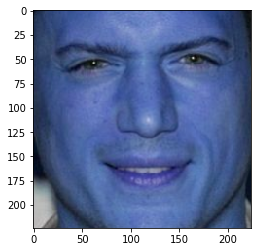

In [2]:
# Get face with dlib hog
path_image = "Michael Scofield.png"

detector = dlib.get_frontal_face_detector()

image = cv2.imread(path_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)
top, right, bottom, left = rects[0].top(),rects[0].right(),rects[0].bottom(),rects[0].left()
face = image[top:bottom,left:right]
face = cv2.resize(face,(224,224))

cv2.imwrite("face.jpg",face)

plt.imshow(face)
plt.show()

In [3]:
# create a vggface model
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [4]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(faces):
    # resize faces
    faces = [cv2.resize(cv2.imread(f),(224,224)) for f in faces]
    # convert into an array of samples
    samples = np.asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)

    # perform prediction
    yhat = model.predict(samples)
    return yhat

In [5]:
# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
        print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
        return True
    else:
        print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))
        return False

In [6]:
%time embeddings = get_embeddings(["face.jpg"])

feature_ms = embeddings[0]

CPU times: user 2.6 s, sys: 46.9 ms, total: 2.65 s
Wall time: 2.43 s


In [7]:
# initialize dlib's face detector (HOG-based)
detector = dlib.get_frontal_face_detector()

# create a videoCapture object with a video file or a capture device
cap = cv2.VideoCapture('./prison_break.mp4')

# check if we will successfully open the file
if not cap.isOpened():
    print("Error opening the file.")
    assert(False)

# # Default resolutions of the frame are obtained.The default resolutions are system dependent.
# frame_width = int(cap.get(3))
# frame_height = int(cap.get(4))

# # Define the codec and create VideoWriter object.The output is stored in 'output.mp4' file.
# out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

# read until the end of the video frame by frame
while cap.isOpened():
    # cap.read (): decodes and returns the next video frame
    # variable ret: will get the return value by retrieving the camera frame, true or false (via "cap")
    # variable frame: will get the next image of the video (via "cap")
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.resize(frame, (1000,600))

        # detect faces in the grayscale frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        rects = detector(gray, 0)
        
        for rect in rects:
            top, right, bottom, left = abs(rect.top()),abs(rect.right()),abs(rect.bottom()),abs(rect.left())
            face = frame[top:bottom,left:right]
            face = cv2.resize(face,(224,224))

            # convert into an array of samples
            samples = np.asarray([face], 'float32')
            # prepare the face for the model, e.g. center pixels
            samples = preprocess_input(samples, version=2)

            # perform prediction
            yhat = model.predict(samples)
            
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
            
            if is_match(feature_ms, yhat[0]) == True:
                cv2.putText(frame, "Michael Scofield", (left-5,top-5), font, 1, (0,255,255), 2)
            else:
                cv2.putText(frame, "unknown", (left-5,top-5), font, 1, (0,255,255), 2)
            
        # to display the frame
        cv2.imshow("Output", frame)
        
        # Write the frame into the file 'output.avi'
        # out.write(frame)

        # waitKey (0): put the screen in pause because it will wait infinitely that key
        # waitKey (n): will wait for keyPress for only n milliseconds and continue to refresh and read the video frame using cap.read ()
        # ord (character): returns an integer representing the Unicode code point of the given Unicode character.
        if cv2.waitKey(1) == ord('e'):
            break
    else:
        break

# to release software and hardware resources
cap.release()
# out.release()

# to close all windows in imshow ()
cv2.destroyAllWindows()

>face is NOT a Match (0.698 > 0.500)
>face is NOT a Match (0.725 > 0.500)
>face is NOT a Match (0.714 > 0.500)
>face is a Match (0.434 <= 0.500)
>face is a Match (0.429 <= 0.500)
>face is a Match (0.444 <= 0.500)
>face is a Match (0.431 <= 0.500)
>face is a Match (0.429 <= 0.500)
>face is a Match (0.439 <= 0.500)
>face is a Match (0.472 <= 0.500)
>face is a Match (0.459 <= 0.500)
>face is a Match (0.459 <= 0.500)
>face is a Match (0.446 <= 0.500)
>face is a Match (0.482 <= 0.500)
>face is a Match (0.489 <= 0.500)
>face is a Match (0.482 <= 0.500)
>face is a Match (0.484 <= 0.500)
>face is a Match (0.487 <= 0.500)
>face is a Match (0.483 <= 0.500)
>face is a Match (0.475 <= 0.500)
>face is a Match (0.470 <= 0.500)
>face is a Match (0.458 <= 0.500)
>face is a Match (0.451 <= 0.500)
>face is a Match (0.435 <= 0.500)
>face is a Match (0.427 <= 0.500)
>face is NOT a Match (0.724 > 0.500)
>face is NOT a Match (0.736 > 0.500)
>face is NOT a Match (0.723 > 0.500)
>face is NOT a Match (0.722 > 